<a href="https://colab.research.google.com/github/gragguu/Grahesh-CV/blob/main/MC_simulation_for_Construction_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [10]:
def get_data(stocks,start,end):
  stockData = yf.download(stocks, start=start, end=end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns,covMatrix

In [11]:
stockList =['RELINFRA.NS','IRB.NS','NCC.NS','ASHOKA.NS','CAT']
stocks = stockList
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300)
meanReturns,covMatrix = get_data(stocks,startDate,endDate)

print("Mean Daily Returns:")
print(meanReturns)
print("\nCovariance Matrix:")
print(covMatrix)

/tmp/ipython-input-1622572885.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download(stocks, start=start, end=end)
[*********************100%***********************]  5 of 5 completed

Mean Daily Returns:
Ticker
ASHOKA.NS     -0.000692
CAT            0.004302
IRB.NS        -0.000203
NCC.NS        -0.001230
RELINFRA.NS   -0.002452
dtype: float64

Covariance Matrix:
Ticker       ASHOKA.NS       CAT    IRB.NS    NCC.NS  RELINFRA.NS
Ticker                                                           
ASHOKA.NS     0.000371  0.000022  0.000114  0.000172     0.000209
CAT           0.000022  0.000334  0.000007  0.000029    -0.000008
IRB.NS        0.000114  0.000007  0.000212  0.000151     0.000149
NCC.NS        0.000172  0.000029  0.000151  0.000313     0.000193
RELINFRA.NS   0.000209 -0.000008  0.000149  0.000193     0.001108



/tmp/ipython-input-1622572885.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change()


/tmp/ipython-input-2706927619.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stockList, start=startDate, end=endDate)['Close']
[*********************100%***********************]  5 of 5 completed


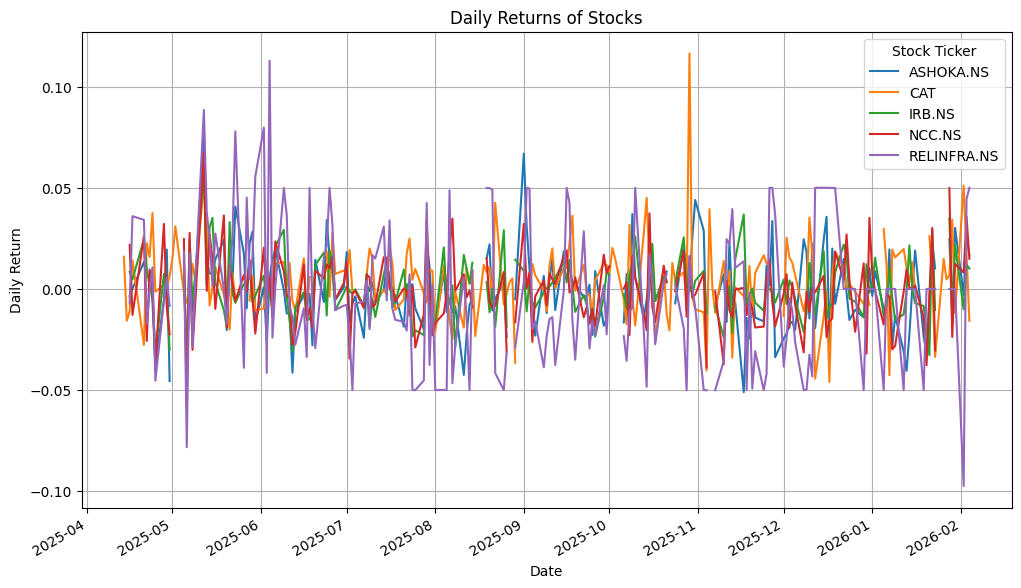

In [17]:
stock_data = yf.download(stockList, start=startDate, end=endDate)['Close']
daily_returns = stock_data.pct_change(fill_method=None)

plt.figure(figsize=(12, 7))
daily_returns.plot(ax=plt.gca())
plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(title='Stock Ticker')
plt.grid(True)
plt.show()

In [12]:
weights =np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

[0.30607556 0.08707041 0.15578794 0.15387392 0.29719218]


/tmp/ipython-input-3893778842.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stock Ticker')


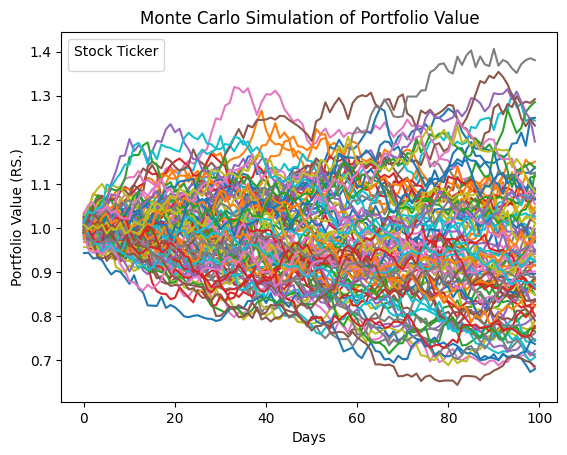

In [26]:
mc_sims = 100
T = 100

meanM = np.full(shape=(T, len(weights)), fill_value = meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value = 0.0)

for m in range(0,mc_sims):
  z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)
  dailyReturns = meanM + np.inner(L,z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value (RS.)')
plt.xlabel('Days')
plt.title ('Monte Carlo Simulation of Portfolio Value')
plt.legend(title='Stock Ticker')
plt.show()



In [27]:
def mcCVar(returns,alpha =5):
  if isinstance(retuns, pd.Series):
    return np.percentile(returns,)
    else:
      raise TypeError('expected a pandas data series.')

      def mcCVar(returns,alpha =5):
  if isinstance(retuns, pd.Series):
    return np.percentile(returns,)
    else:
      raise TypeError('expected a pandas data series.')

SyntaxError: invalid syntax (ipython-input-238875603.py, line 4)